Q7 平均プーリング

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

imori = cv2.imread("imori.jpg")

def show_image(a):
    img_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

In [41]:
def average_pooling(img):
    image = img.copy()
    for i in range (0,16):
        for t in range(0,16):
            b = image[8*i:8*i+8,8*t:8*t+8,0]
            g = image[8*i:8*i+8,8*t:8*t+8,1]
            r = image[8*i:8*i+8,8*t:8*t+8,2]
            
            for j in range(8*i,8*i+8):
                for k in range(8*t,8*t+8):
                    image[j,k,0] = b.sum()/64
                    image[j,k,1] = g.sum()/64
                    image[j,k,2] = r.sum()/64
    
    return image

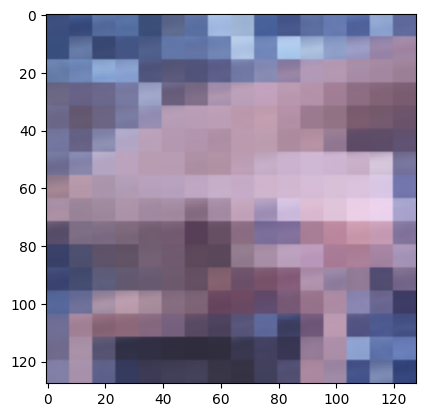

In [42]:
q7_img = average_pooling(imori)
show_image(q7_img)

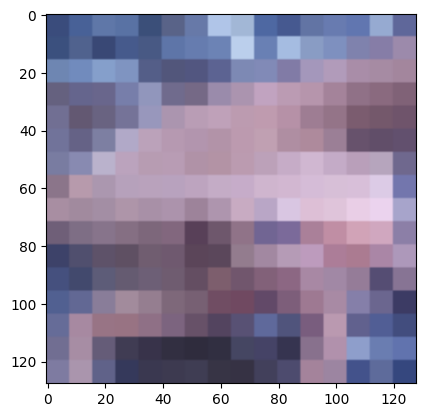

In [9]:
def answer(img,G=8):
    out = img.copy()

    H, W, C = img.shape
    Nh = int(H / G)
    Nw = int(W / G)

    for y in range(Nh):
        for x in range(Nw):
            for c in range(C):
                out[G*y:G*(y+1), G*x:G*(x+1), c] \
                    = np.mean(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(int)
    
    return out

answer_img = answer(imori)
show_image(answer_img)